# Decision Tree Algorithms

## Agenda
- How does the Decision Tree algorithm work?
- Attribute Selection Measures
- Information Gain
- Gini index
- Optimizing Decision Tree Performance
- Pros and Cons

The **CART algorithm** is structured as a sequence of questions to try and split up the different observations into their own groups. The result of these questions is a tree like structure where the ends are terminal nodes at which point there are no more questions.  A simple example of a decision tree is as follows:

<img src='./images/titanic_tree.png' width=600/>

## How does the Decision Tree algorithm work?


The basic idea behind any decision tree algorithm is as follows:

* Select the best attribute using Attribute Selection Measures(ASM) to split the records.
* Make that attribute a decision node and breaks the dataset into smaller subsets.
* Starts tree building by repeating this process recursively for each child until one of the condition will match:
    * All the tuples belong to the same attribute value.
    * There are no more remaining attributes.
    * There are no more instances.

<img src='./images/decision_leaf.webp' width=600 />

### Important Terminology related to Decision Trees
Let’s look at the basic terminologies used with Decision trees:

- **Root Node:** It represents entire population or sample and this further gets divided into two or more homogeneous sets.
- **Decision Node:** When a sub-node splits into further sub-nodes, then it is called decision node.
- **Leaf/ Terminal Node:** Nodes with no children (no further split) is called Leaf or Terminal node.
- **Pruning:** When we reduce the size of decision trees by removing nodes (opposite of Splitting), the process is called pruning.
- **Branch / Sub-Tree:** A sub section of decision tree is called branch or sub-tree.
- **Parent and Child Node:** A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.


# Decision Tree Classifier



Imagine we are trying to build a decision tree classifier to predict whether or not a person will play golf based on the weather.

<img src='./images/Decision_Tree_1.png' width=600/>



## Attribute Selection Measures
Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute. In the case of a continuous-valued attribute, split points for branches also need to define. Most popular selection measures are Information Gain, Gain Ratio, and Gini Index.

## Entropy 

In 1948, Claude Shannon introduced the concept of information entropy in his paper “A Mathematical Theory of Communication”.

The idea of entropy is confusing at first because so many words are used to describe it: disorder, uncertainty, surprise, unpredictability, amount of information and so on.


**Entropy** is a measure of impurity in a group.

<img src='./images/entropy_equation.png'/>

Entropy is a measure that ranges from 0 to 1 based on how *pure* the group is.
<img src='./images/Entropy_mapped.png' width=600/>

Let's calculate the entropy of the entire dataset.

<img src='./images/Entropy_3.png' width=600/>

Now let's calculate the entropy of our resulting groups if we split our dataset based on the 'Outlook' variable.

<img src='./images/Entropy_2.png' width=600/>

### Information Gain
The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).	

	
***Step 1:*** Calculate entropy of the target. 

<img src='./images/Entropy_target.png' width=600/>


***Step 2:*** The dataset is then split on the different attributes. The entropy for each branch is calculated. Then it is added proportionally, to get total entropy for the split. The resulting entropy is subtracted from the entropy before the split. The result is the Information Gain, or decrease in entropy. 

<img src='./images/Entropy_attributes.png' width=600/>


<img src='./images/Entropy_gain.png' width=600/>


		
***Step 3:*** Choose attribute with the largest information gain as the decision node, divide the dataset by its branches and repeat the same process on every branch.

<img src='./images/decision_tree_slices.png' width=600/>


***Step 4a:*** A branch with entropy of 0 is a leaf node.

<img src='./images/Entropy_overcast.png' width=600/>


***Step 4b:*** A branch with entropy more than 0 needs further splitting.
    
<img src='./images/Entropy_sunny.png' width=600/>


***Step 5:*** The  algorithm is run recursively on the non-leaf branches, until all data is classified.	

#### Deeper Dive on Entropy
- https://towardsdatascience.com/demystifying-entropy-f2c3221e2550
- https://towardsdatascience.com/entropy-is-a-measure-of-uncertainty-e2c000301c2c

### Gini impurity

Gini impurity gives us some measure of the “trivial guessing accuracy” for a categorical dataset with an arbitrary discrete probability distribution on the categories. Examples make the concept quite clear:

1. Say, we have a set that contains two labels {0,1}, and that each label occurs with equal probability. Then, the trivial guessing accuracy is simply 50%. Why? Well, about half our guesses of 0 will be incorrect and half our guesses of 1 will be incorrect, resulting in mistakes 100×((0.5×0.5)+(0.5×0.5)) = 50% of the time.

2. What if the labels occur with probability 0.3 and 0.7, respectively? Well, let’s label randomly again, but this time, use a biased coin - we’ll label 30% of the elements as 0 and 70% of elements as 1. This time, 30% of our guesses are wrong 70% of the time and 70% of our guesses are wrong 30% of the time. We’d therefore achieve an error rate of approximately 100×((0.3×0.7)+(0.7×0.3)) = 42%. *Note that 42% exceeds 30%, which is the minimum possible error under this set up (the Gini impurity measure of “trivial guessing accuracy” does not assume the optimal guessing strategy).*

3. You should see that this procedure generalizes to a set of 𝐶 categorical variables, and that a general formula is expressed as a function of the vector of probabilities $\vec{p}: I_G(\vec{p}) = \sum_{i = 1}^C p_i (1 - p_i)$ This is the formula for Gini impurity!

<img src='./images/gini_equation.svg' width=800/>

<img src='./images/gini_graphed.png' />

**Example:** — Referring to example where we want to segregate the students based on target variable ( playing cricket or not ). In the snapshot below, we split the population using two input variables Gender and Class. YOU want to identify which split is producing more homogeneous sub-nodes using Gini index.

<img src='./images/gini_split.png' width=750/>


**Split on Gender:**

Gini for sub-node $Female = (0.2)*(0.2)+(0.8)*(0.8)=0.68$

Gini for sub-node $Male = (0.65)*(0.65)+(0.35)*(0.35)=0.55$

Weighted Gini for $Split Gender = (10/30)*0.68+(20/30)*0.55 = 0.59$


**Similar for Split on Class:**

Gini for sub-node $Class IX = (0.43)*(0.43)+(0.57)*(0.57)=0.51$

Gini for sub-node $Class X = (0.56)*(0.56)+(0.44)*(0.44)=0.51$

Weighted Gini for $Split Class = (14/30)*0.51+(16/30)*0.51 = 0.51$


Above, you can see that Gini score for Split on Gender is higher than Split on Class, hence, the node split will take place on Gender.

Great explanation on the derivation fo the Gini index.

https://www.quora.com/What-is-the-interpretation-and-intuitive-explanation-of-Gini-impurity-in-decision-trees

**Which measure should we use?** 

<img src='./images/gini_entropy_chart.png' />



As found in *Introduction to Data Mining* by Tan et. al:

`Studies have shown that the choice of impurity measure has little effect on the performance of decision tree induction algorithms. This is because many impurity measures are quite consistent with each other [...]. Indeed, the strategy used to prune the tree has a greater impact on the final tree than the choice of impurity measure.`

### Bias-Variance with Decision Trees

The CART algorithm will repeatedly partition data into smaller and smaller subsets until those final subsets are homogeneous in terms of the outcome variable. In practice this often means that the final subsets (known as the leaves of the tree) each consist of only one or a few data points.

Do you think this will lead to an overfit or underfit model?

## Stopping Criterion - Pruning Parameters


The recursive binary splitting procedure described above needs to know when to stop splitting as it works its way down the tree with the training data.

**min_samples_leaf:**  The most common stopping procedure is to use a minimum count on the number of training instances assigned to each leaf node. If the count is less than some minimum then the split is not accepted and the node is taken as a final leaf node.

**max_leaf_nodes:** 
Reduce the number of leaf nodes

**max_depth:**
Reduce the depth of the tree to build a generalized tree
Set the depth of the tree to 3, 5, 10 depending after verification on test data

**min_impurity_split :**
A node will split if its impurity is above the threshold, otherwise it is a leaf.


## Conclusions 

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

#### Pros
- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.

#### Cons
- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

# Training and visualizing

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [19]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Saving figure decision_tree_decision_boundaries_plot


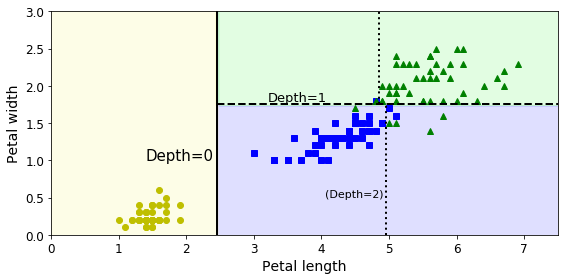

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Predicting classes and class probabilities

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

# Sensitivity to training set details

In [7]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [8]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

Saving figure decision_tree_instability_plot


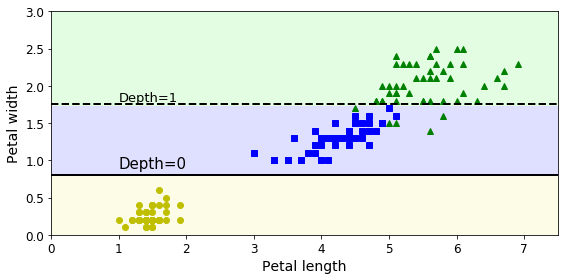

In [9]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

Saving figure min_samples_leaf_plot


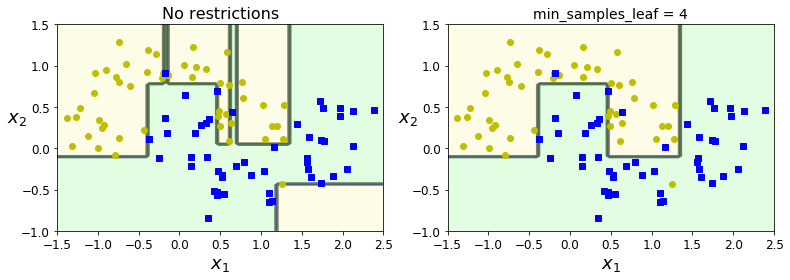

In [10]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

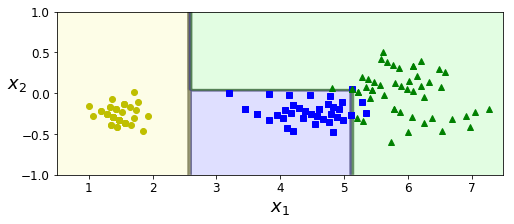

In [11]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

Saving figure sensitivity_to_rotation_plot


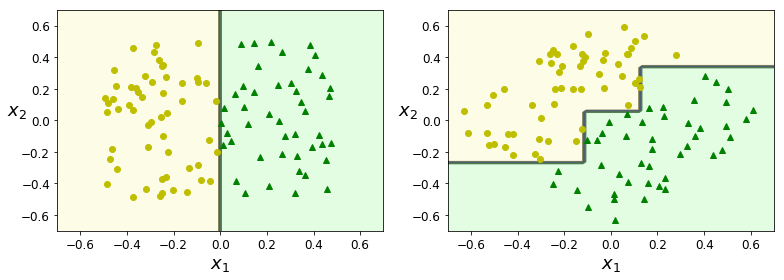

In [12]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

save_fig("sensitivity_to_rotation_plot")
plt.show()